DATA SCIENCE TASK 3:Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('D:/PRODIGY/bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#label encoding for the categorical columns
data['job']=data['job'].astype('category').cat.codes
data['marital']=data['marital'].astype('category').cat.codes
data['education']=data['education'].astype('category').cat.codes
data['default']=data['default'].astype('category').cat.codes
data['housing']=data['housing'].astype('category').cat.codes
data['loan']=data['loan'].astype('category').cat.codes
data['contact']=data['contact'].astype('category').cat.codes
data['month']=data['month'].astype('category').cat.codes
data['poutcome']=data['poutcome'].astype('category').cat.codes
data['y']=data['y'].astype('category').cat.codes


In [9]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


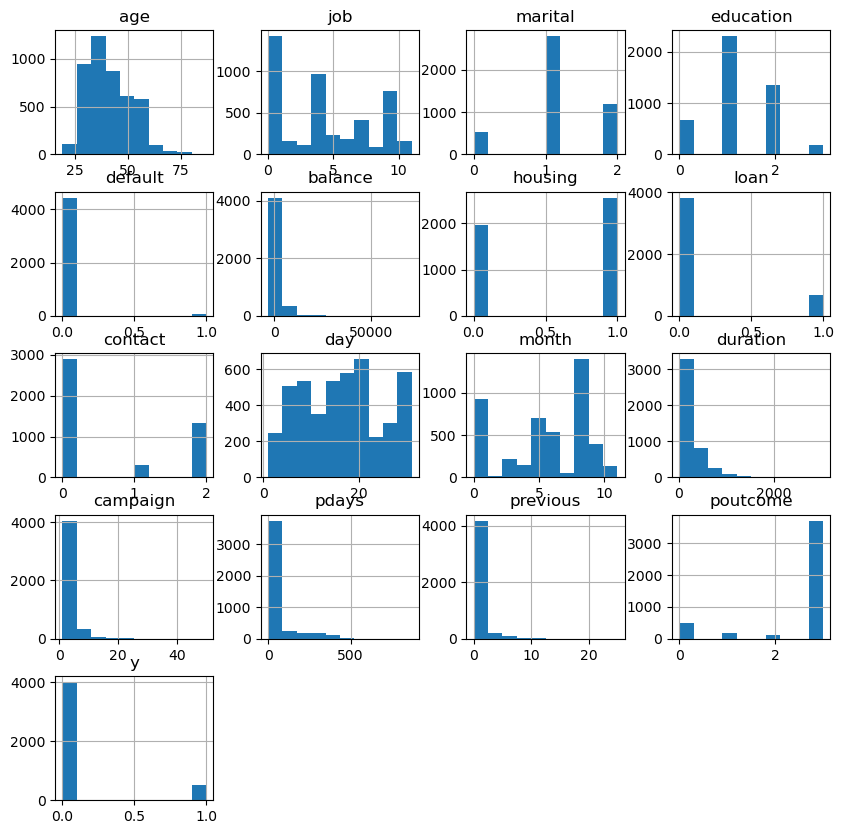

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
data.hist(figsize=(10,10))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


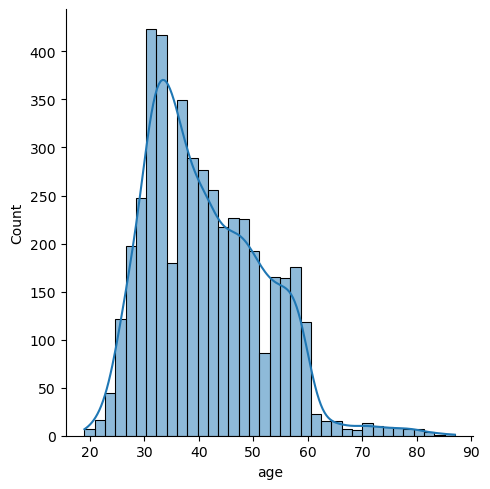

In [12]:
sns.displot(data['age'],kde=True)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


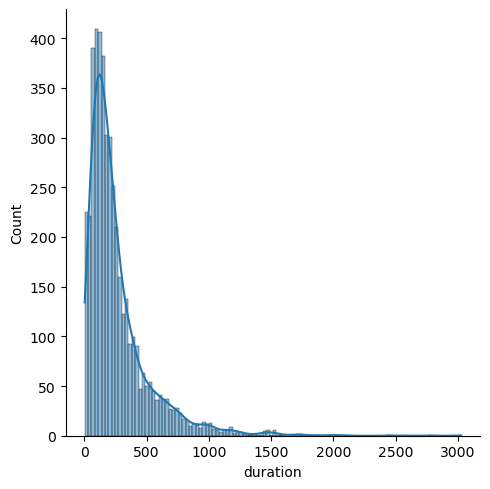

In [14]:
sns.displot(data['duration'], kde=True)

<Axes: xlabel='job', ylabel='count'>

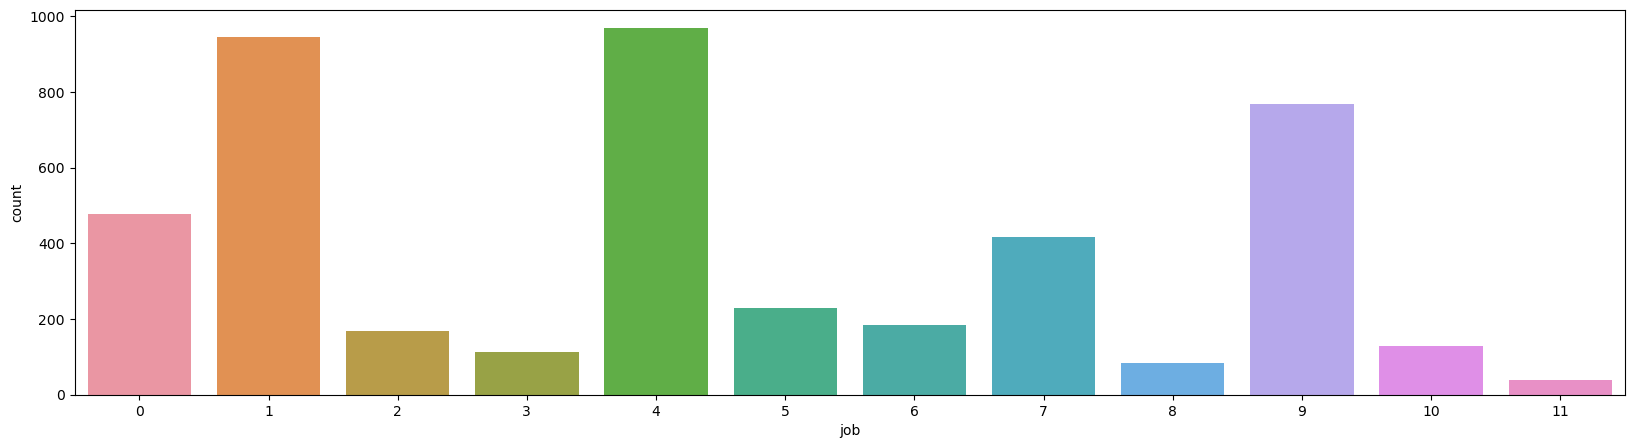

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(data=data,x='job')

<Axes: xlabel='education', ylabel='count'>

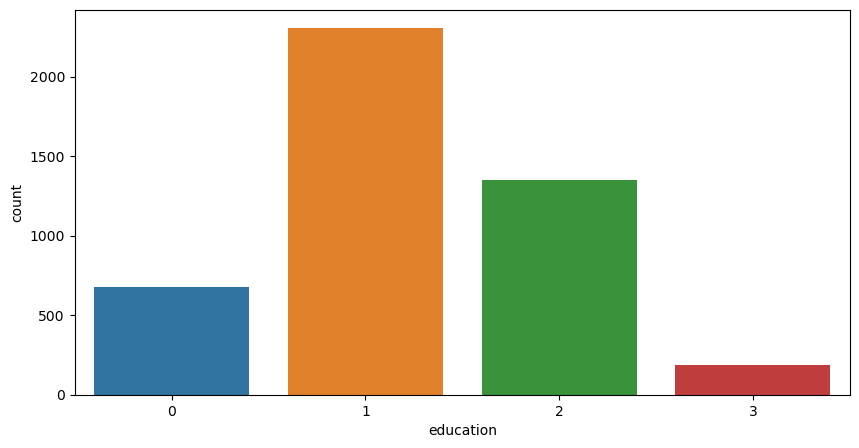

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='education')

<Axes: xlabel='loan', ylabel='count'>

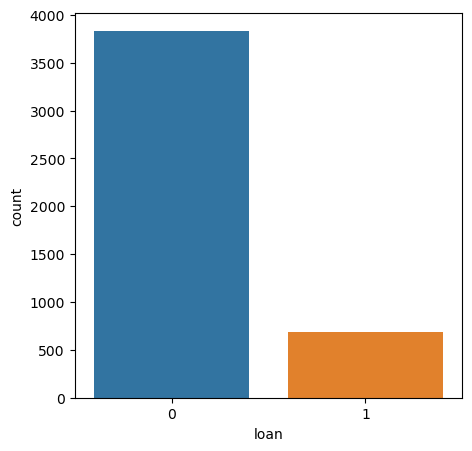

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='loan')

<Axes: xlabel='marital', ylabel='count'>

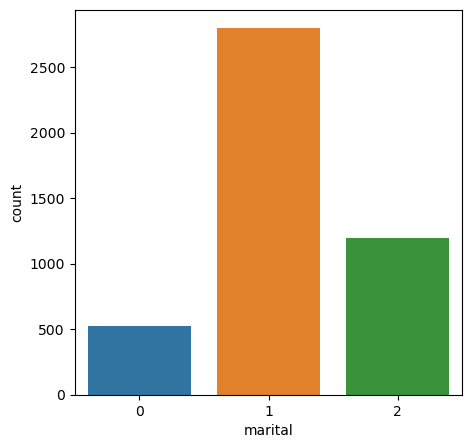

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='marital')

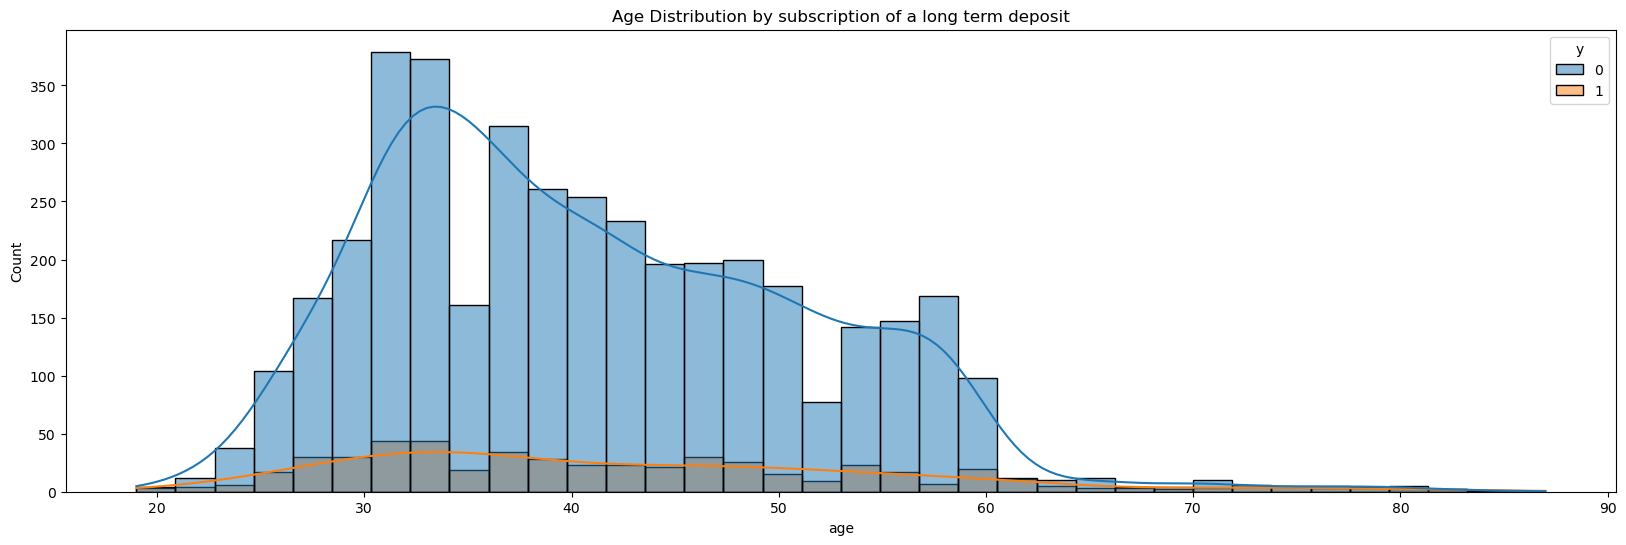

In [20]:
#the distribution of ages of the passengers
plt.figure(figsize=(20, 6))
sns.histplot(data=data, x='age', kde=True, hue='y')
plt.title('Age Distribution by subscription of a long term deposit')
plt.show()

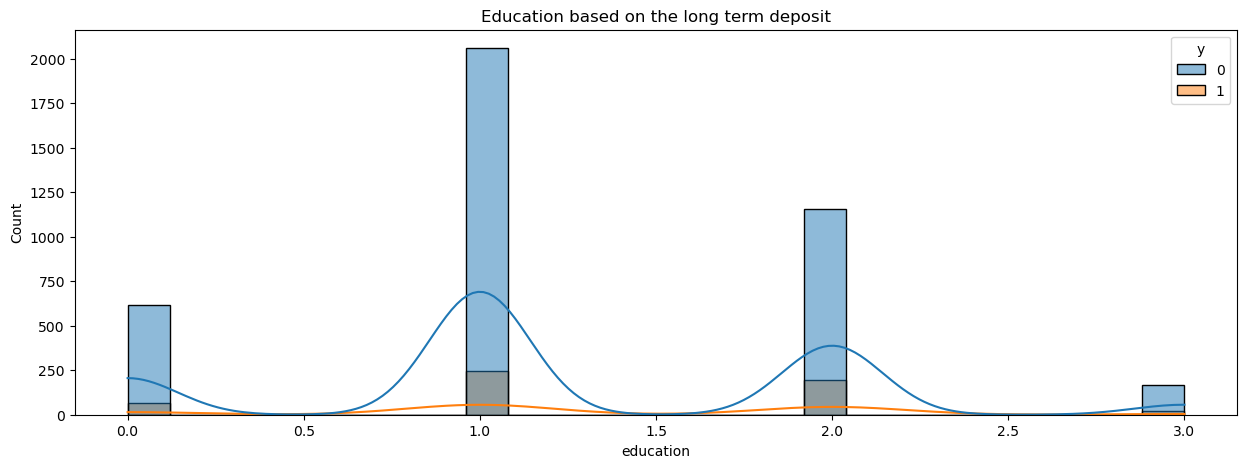

In [21]:
plt.figure(figsize=(15,5))
sns.histplot(data=data,x='education',hue='y',kde=True)
plt.title("Education based on the long term deposit")
plt.show()

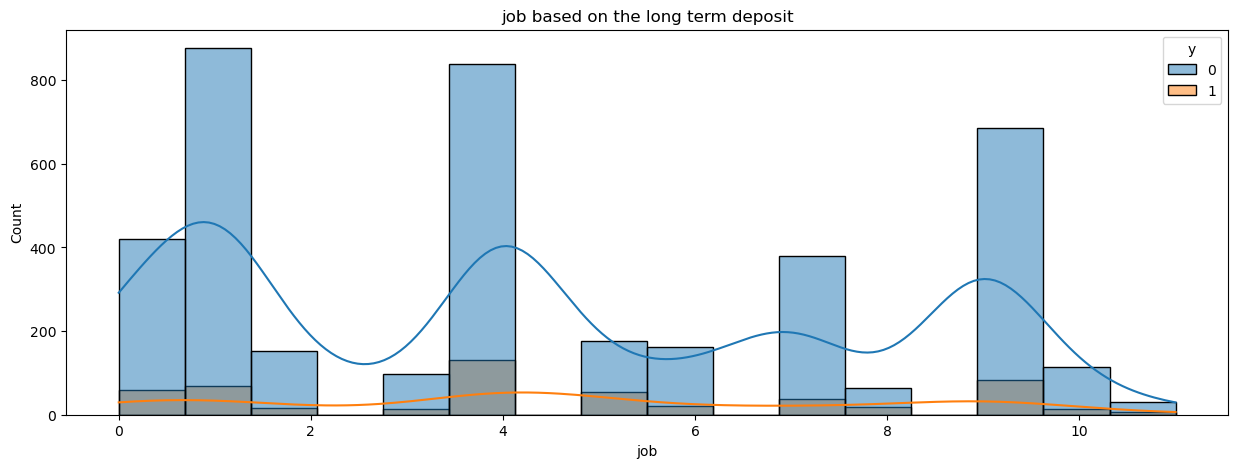

In [22]:
plt.figure(figsize=(15,5))
sns.histplot(data=data,x='job',hue='y',kde=True)
plt.title("job based on the long term deposit")
plt.show()

In [24]:
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score( y_test,y_pred)
print('The accuracy of decision tree based on gini index is:',acc)

The accuracy of decision tree based on gini index is: 0.8961325966850828


[Text(0.5, 0.875, 'x[11] <= 645.5\ngini = 0.207\nsamples = 3616\nvalue = [3193, 423]'),
 Text(0.25, 0.625, 'x[11] <= 211.5\ngini = 0.153\nsamples = 3333\nvalue = [3054, 279]'),
 Text(0.125, 0.375, 'x[10] <= 9.5\ngini = 0.057\nsamples = 2028\nvalue = [1968, 60]'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 1978\nvalue = [1928, 50]'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 50\nvalue = [40, 10]'),
 Text(0.375, 0.375, 'x[13] <= 22.5\ngini = 0.279\nsamples = 1305\nvalue = [1086, 219]'),
 Text(0.3125, 0.125, 'gini = 0.204\nsamples = 1041\nvalue = [921, 120]'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 264\nvalue = [165, 99]'),
 Text(0.75, 0.625, 'x[10] <= 7.5\ngini = 0.5\nsamples = 283\nvalue = [139, 144]'),
 Text(0.625, 0.375, 'x[11] <= 795.0\ngini = 0.483\nsamples = 164\nvalue = [67, 97]'),
 Text(0.5625, 0.125, 'gini = 0.496\nsamples = 70\nvalue = [38, 32]'),
 Text(0.6875, 0.125, 'gini = 0.427\nsamples = 94\nvalue = [29, 65]'),
 Text(0.875, 0.375, 'x[8] <= 0.5\ngini = 0.478\ns

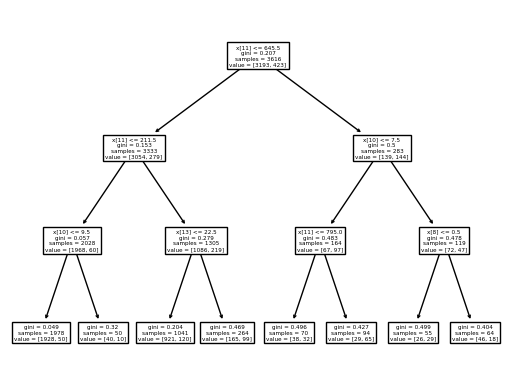

In [27]:
from sklearn.tree import plot_tree
plot_tree(model)

The accuracy of decision tree based on entropy is: 0.8961325966850828


[Text(0.5, 0.875, 'x[11] <= 645.5\ngini = 0.207\nsamples = 3616\nvalue = [3193, 423]'),
 Text(0.25, 0.625, 'x[11] <= 211.5\ngini = 0.153\nsamples = 3333\nvalue = [3054, 279]'),
 Text(0.125, 0.375, 'x[10] <= 9.5\ngini = 0.057\nsamples = 2028\nvalue = [1968, 60]'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 1978\nvalue = [1928, 50]'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 50\nvalue = [40, 10]'),
 Text(0.375, 0.375, 'x[13] <= 22.5\ngini = 0.279\nsamples = 1305\nvalue = [1086, 219]'),
 Text(0.3125, 0.125, 'gini = 0.204\nsamples = 1041\nvalue = [921, 120]'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 264\nvalue = [165, 99]'),
 Text(0.75, 0.625, 'x[10] <= 7.5\ngini = 0.5\nsamples = 283\nvalue = [139, 144]'),
 Text(0.625, 0.375, 'x[11] <= 795.0\ngini = 0.483\nsamples = 164\nvalue = [67, 97]'),
 Text(0.5625, 0.125, 'gini = 0.496\nsamples = 70\nvalue = [38, 32]'),
 Text(0.6875, 0.125, 'gini = 0.427\nsamples = 94\nvalue = [29, 65]'),
 Text(0.875, 0.375, 'x[8] <= 0.5\ngini = 0.478\ns

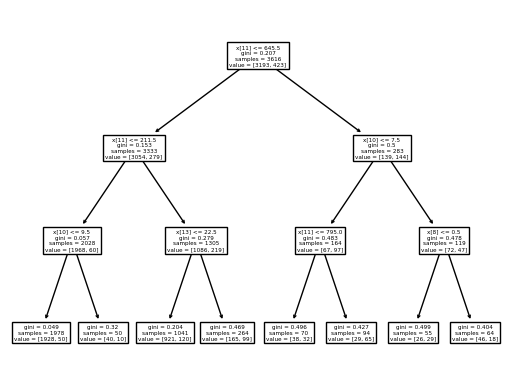

In [28]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score( y_test,y_pred)
print('The accuracy of decision tree based on entropy is:',acc)
plot_tree(model)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.55      0.24      0.34        98

    accuracy                           0.90       905
   macro avg       0.73      0.61      0.64       905
weighted avg       0.87      0.90      0.88       905



In [30]:
print(confusion_matrix(y_test,y_pred))

[[787  20]
 [ 74  24]]


In [31]:
# Save the model to a file
import pickle
with open("model.pkl", "wb") as a:
    pickle.dump(model, a)

# Load the model back
with open("model.pkl", "rb") as a:
    loaded_model = pickle.load(a)

In [32]:
data1=pd.DataFrame({'age':35,
                    'job':4,
                    'marital':2,
                    'education':1,
                    'default':0,
                    'balance':1670,
                    'housing':1,
                    'loan':0,
                    'contact':1,
                    'day':27,
                    'month':5,
                    'duration':279,
                    'campaign':4,
                    'pdays':133,
                    'previous':1,
                    'poutcome':2},index=[0])

In [33]:
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,4,2,1,0,1670,1,0,1,27,5,279,4,133,1,2


In [34]:
result=loaded_model.predict(data1)
print(result)
                 

[0]


In [36]:
if result==1:
    print("The client subscribed a term deposit")
else:
    print("The client has not subscribed a term deposit")

The client has not subscribed a term deposit
